# Скорость
# dx трапеция

In [27]:
import math
import matplotlib.pyplot as plt
import numpy
import cv2
from IPython.display import Image
import os

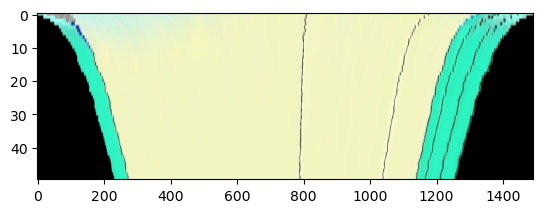

In [28]:
def velocity(angle, peaks):
    #   frames  - матрица для каждого кадра со значением цветов RGB
    #   peaks   - положения пиков интенсивности на гранях отверстий
    #   angle   - угол поворота в рад (по часовой +, против -)
    
    new_peaks = []      # повернутая система координат k - номер кадра, i - номер пика,
                        #   = координата пика
    dist = [[]]         # расстояния между пиками
    dx = 0              # сторона усеченной пирамиды
    
    for k in range(2): 
        #dist.append()
        temp = []
        for i in range(3):
            temp.append((peaks[k][i][1]+peaks[k][i][0]/math.cos(angle[k]))*(math.cos(angle)+math.sin(angle[k])*math.tan(angle[k]))**(-1))
            try:
                dist[k][i] = temp[-1] - dist[k][i]
            except:
                pass
            dist[k].append(temp[-1])
        
        new_peaks.append(temp)

    #   проверка на потерю пика у края кадра
    if dist[0][0]>dist[1][0]:
        dx = new_peaks[0][1] - new_peaks[1][1]
    else:
        dx = new_peaks[0][0] - new_peaks[0][1]
    
    return dx # Кол-во пикселей

def trapezoid(frame, angle, dx):
    #   frames  - матрица для каждого кадра со значением цветов RGB
    #   angle   - угол поворота в рад (по часовой +, против -)

    center_x = round(len(frame)/2-1)
    center_y = round(len(frame[0])/2-1)

    radius = min(center_y,center_x)
    rad_inner = radius-dx

    trap=[]
    #frame_copy = frame.copy()
    row = -1
    d_phi = 2*math.pi/abs(2*math.pi*center_y)
    
    while radius > rad_inner:
        
        trap.append([])
        row += 1
        phi = math.pi/2-angle

        prev_px = []
        while phi < 2 * math.pi + math.pi/2-angle:
            #prev_px = []
            #print(round(center_x+radius*math.cos(math.pi/2+phi)), round(center_y-radius*math.sin(math.pi/2+phi)))
            #next_px = [round(center_x+radius*math.cos(math.pi/2+phi)), round(center_y-radius*math.sin(math.pi/2+phi))]
            next_px = [round(center_x+radius*math.cos(-math.pi/2-phi)), round(center_y+radius*math.sin(-math.pi/2-phi))]
            try:
                if prev_px != next_px:
                    #print(next_px[0],next_px[1])
                    trap[row].append(list(frame[next_px[0]][next_px[1]]))
            except:
                trap[row].append(list(frame[next_px[0]][next_px[1]]))
            
            # Новый круг
            prev_px = next_px.copy()
            phi += d_phi
            
        radius -= 1
        d_phi = 2*math.pi/(len(trap[row])-2)
    
    #print(trap)
    trap = fill(trap)
    
    return trap

def fill(arr):

    #del arr[0][0]
    max_len = len(arr[0])
    for row in range(1, len(arr)):
        #for col in range(len(arr[row], len(arr[0]))):
        #    arr[row].app
        arr[row] = [[0,0,0]] * int((max_len - len(arr[row]))/2) + arr[row] + [[0,0,0]] * int((max_len - len(arr[row])) / 2)
        if len(arr[row])!=max_len:
            arr[row].append([0,0,0]*(max_len - len(arr[row])))
    
    return arr

image = cv2.imread('../jupyter/5.png')
image2 = trapezoid(image, math.pi/12, 50)
plt.imshow(image2, aspect=10)

In [30]:
#image3=numpy.array([numpy.array(xi) for xi in image2])

def bgr_to_rgb(pixel):
    temp = [pixel[2],pixel[1],pixel[0]]
    return temp

for row in range(len(image2)):
    image2[row] = list(map(bgr_to_rgb, image2[row]))

def kostyl(arr):
    for row in range(len(arr)):
        arr[row] = list(map(bgr_to_rgb, arr[row]))

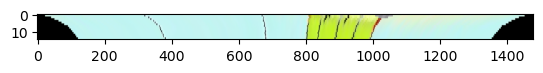

In [152]:
im_earth = cv2.imread('../jupyter/5.png')
im_earth_edit = trapezoid(im_earth, math.pi/12, 15)
kostyl(im_earth_edit)
plt.imshow(im_earth_edit, aspect=5)

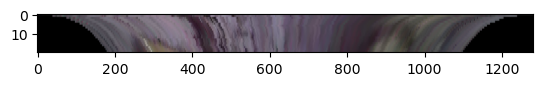

In [69]:
pic = cv2.imread(r'E:\Tokodust\data_frames\1\frame_000.png')
pic2 = trapezoid(pic, 0.009258994662123082, 20)
kostyl(pic2)
plt.imshow(pic2, aspect=5)

In [31]:
def normalnye_ugly(path):
    with open(path + "angle.txt", 'r') as file:
        f = file.read()
    arr = []
    array = f.split('.')
    a = array[0] + '.'
    b = ''
    for i in range(1, len(array)):
        if '-' in array[i]:
            b = array[i][-2] + '.'
            a += array[i][:-2]
        else:
            b = array[i][-1] + '.'
            a += array[i][:-1]
        arr.append(float(a))
        a = b

    return arr

In [32]:
def get_peaks(path):
    with open(path + "picks.txt", 'r') as file:
        f = file.readlines()
    arr = []
    for i in f:
        a = i.split()
        arrr = []
        for j in range(0, len(a), 2):
            arrr.append([int(a[j]), int(a[j+1])])
        arr.append(arrr)
    return arr

In [33]:
#file_count = sum(len(files) for _, _, files in os.walk('E:/Tokodust/data_frames/8'))-2
data_path = 'E:/Tokodust/data_frames/8/'
trap_path = 'E:/Tokodust/data_frames/8.2/'
if not os.path.exists(trap_path):
    os.mkdir(trap_path)

angles = normalnye_ugly(data_path)

peaks = get_peaks(data_path)

#all_pics = []
i = 0
for filename in os.listdir(data_path):
    if '.png' in filename:
        pic = cv2.imread(data_path+filename)
        #dx = velocity(angles, peaks[i:])
        pic2 = trapezoid(pic, angles[i], 15)
        kostyl(pic2)
        #plt.imshow(pic2, aspect=5)
        cv2.imwrite(r'E:\Tokodust\data_frames\8.2\{:03d}.png'.format(i), numpy.array(pic2))
        #all_pics.append(pic2)
        #result = Image.fromarray((visual * 255).astype(numpy.uint8))
        i += 1

In [12]:
import TrapStretch

map2d = TrapStretch.stretch_sequence_of_traps()

KeyboardInterrupt: 

In [34]:
import cv2
import numpy as np
import os

def stretch_trap(trap, l=int(np.pi*480)):
    out_matrix = np.zeros_like(trap)
    for k in range(trap.shape[0]):
        string_without_nulls = trap[k,:,:][np.sum(trap[k,:,:], 1) != 0]
        out_matrix[k,:,:] = cv2.resize(string_without_nulls, (3,trap.shape[1]), interpolation = cv2.INTER_CUBIC)
    out_matrix = cv2.resize(out_matrix, (l, out_matrix.shape[1]), interpolation = cv2.INTER_CUBIC)
    return out_matrix
def stretch_sequence_of_traps(path = trap_path):
    trap_1 = cv2.imread(path + '000.png')
    out_image = stretch_trap(trap_1)
    file_count = sum(len(files) for _, _, files in os.walk(path))
    for filename in os.listdir(path):
        #trap_1 = cv2.imread(path + '{:03d}.png'.format(i))
        #print(path+str(filename))
        trap_1 = cv2.imread(path+filename)
        out_image = cv2.vconcat([out_image, stretch_trap(trap_1)])
        
    return out_image

map2d = stretch_sequence_of_traps()
cv2.imwrite(r'E:\Tokodust\data_frames\xxx8.3.png', map2d)

KeyboardInterrupt: 

In [18]:
cv2.imwrite(r'E:\Tokodust\data_frames\xxx8.2.png', map2d[:int(len(map2d)/5)])

True